# 1.  Neuron with self-connection 

In [2]:
#import relevant libraries 
import numpy as np 
import matplotlib.pyplot as plt 

In [3]:
#set parameters 
I =3; w=0.05 

In [4]:
#functions i will need 
#dr/dt -- assumes constant I to start 


#activation function
def act(s): 
    return 60*(1+np.tanh(s)) 

def dr(r,w=0.05,I = -3): 
    return -r + act(w*r + I) 

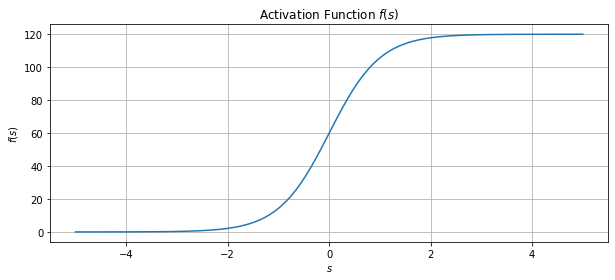

In [5]:
# 1.1 plot the activation function 
s_vals = np.linspace(-5,5,100)
f_vals = np.array([act(s) for s in s_vals])

# set up plot 
plt.figure(figsize=(10, 4))
plt.plot(s_vals,f_vals)
plt.grid()
plt.title("Activation Function $f(s)$")
plt.xlabel("$s$"), plt.ylabel("$f(s)$")
plt.savefig("figures/1-1.png",dpi=500)

In [6]:
#1.2 Simulate The System 

#need to numerically integrate
def euler(r,dt=0.1, w=0.05,I = -3): 
    return r + dr(r)*dt

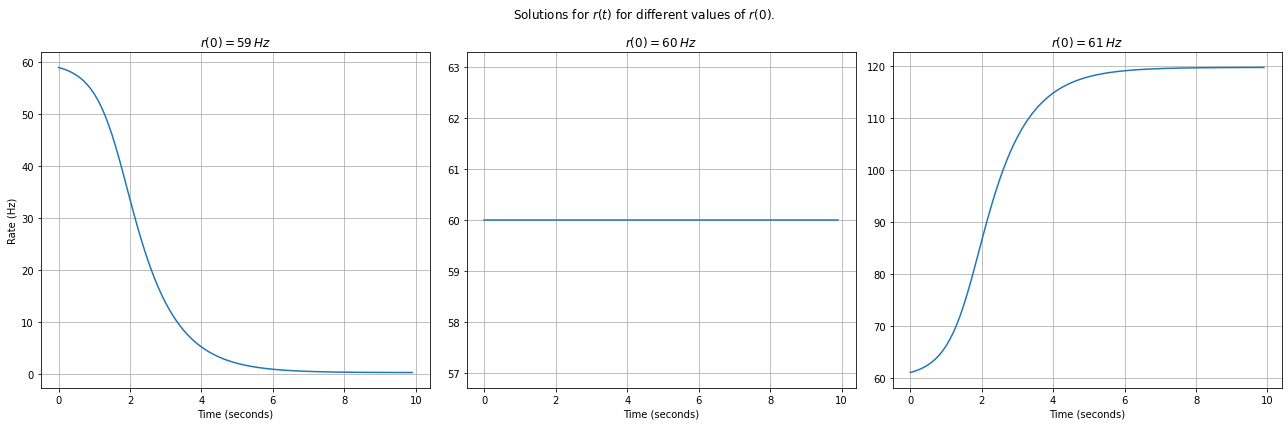

In [7]:
#initialize valeus
r_init_vals = [59,60,61]
dt=0.1
t_vals = np.arange(0,10,dt)

#create sub figs
fig, axs = plt.subplots(1, 3, figsize=(18, 6)) 

#loop through and euler-step for different r_init
for j, r_init in enumerate(r_init_vals):
    
    r_vals = np.zeros(len(t_vals))
    r_vals[0] = r_init 
    
    for i in range(1,len(t_vals)): 
        r_vals[i] = euler(r_vals[i-1],dt)
        
    axs[j].plot(t_vals, r_vals)
    axs[j].grid(True)
    axs[j].set_title(f"$r(0) = {r_init}\: Hz$")
    axs[j].set_xlabel("Time (seconds)")
    if j== 0: axs[j].set_ylabel("Rate (Hz)")
    
fig.suptitle("Solutions for $r(t)$ for different values of $r(0)$.")
plt.tight_layout()
plt.savefig("figures/1-2.png",dpi=500)
plt.show()

In [8]:
# 1.3 Add Noise 

#noisy dr 
def ndr(r,w=0.05,I = -3,sigma=0.1): 
    return -r + act(w*r + I) + sigma*np.random.normal(0,1) 

#noisey euler step 
def euler(r,dt=0.1, w=0.05,I = -3,sig=0.1): 
    return r + ndr(r,sigma=sig)*dt

r_init_vals = [59,60,61]
dt=0.1
t_vals = np.arange(0,10,dt)
sig_vals = np.linspace(0,10,25)

for sig_val in sig_vals:
    #create sub figs
    fig, axs = plt.subplots(1, 3, figsize=(18, 6)) 

    #loop through and euler-step for different r_init
    for j, r_init in enumerate(r_init_vals):

        r_vals = np.zeros(len(t_vals))
        r_vals[0] = r_init 

        for i in range(1,len(t_vals)): 
            r_vals[i] = euler(r_vals[i-1],dt,sig=sig_val)

        axs[j].plot(t_vals, r_vals)
        axs[j].grid(True)
        axs[j].set_title(f"$r(0)$ = {r_init}")

    fig.suptitle(f"Solutions for $r(t)$ for different values of $r(0)$ and $\sigma$ = {sig_val:.2f}.")
    plt.tight_layout()
    #plt.show()

[[0.         0.         0.3        1.        ]
 [0.         0.         0.69529412 1.        ]
 [0.14509804 0.14509804 1.         1.        ]
 [0.70980392 0.70980392 1.         1.        ]
 [1.         0.70980392 0.70980392 1.        ]
 [1.         0.14509804 0.14509804 1.        ]
 [0.78235294 0.         0.         1.        ]
 [0.5        0.         0.         1.        ]]


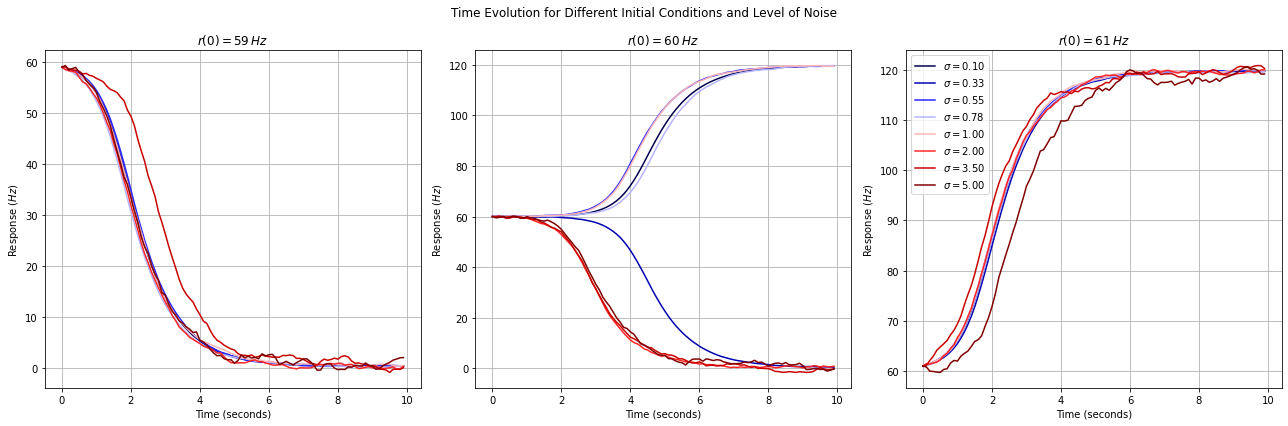

In [9]:
import matplotlib.pyplot as plt
import numpy as np

#initialize 
r_init_vals = [59, 60, 61]
dt = 0.1
t_vals = np.arange(0, 10, dt)
sig_1 = np.linspace(0.1,1,5); sig_2 = np.linspace(2,5,3)
sig_vals = np.concatenate((sig_1,sig_2),axis=0)

np.random.seed(1) 
# Create a figure 
fig, axs = plt.subplots(1, len(r_init_vals), figsize=(18, 6))

#get colors for curves
cmap = plt.get_cmap('seismic')
colors = cmap(np.linspace(0,1,len(sig_vals)))
print(colors)


# Iterate over each value of sig_val
for idx, sig_val in enumerate(sig_vals):

    # Loop through and euler-step for different r_init
    for j, r_init in enumerate(r_init_vals):

        r_vals = np.zeros(len(t_vals))
        r_vals[0] = r_init

        for i in range(1, len(t_vals)):
            r_vals[i] = euler(r_vals[i - 1], dt, sig=sig_val)

        # Access the appropriate subplot 
        ax = axs[j]
        ax.plot(t_vals, r_vals, label=f"$\sigma = {sig_val:.2f}$", color = colors[idx])
        ax.grid(True)
        ax.set_title(f"$r(0) = {r_init}\: Hz$")
        ax.set_xlabel("Time (seconds)")  # Set x-axis label
        ax.set_ylabel("Response ($Hz$)")  # Set y-axis label


plt.legend()
plt.suptitle("Time Evolution for Different Initial Conditions and Level of Noise")
plt.tight_layout()
plt.savefig("figures/1-3.png", dpi=500)
plt.show()

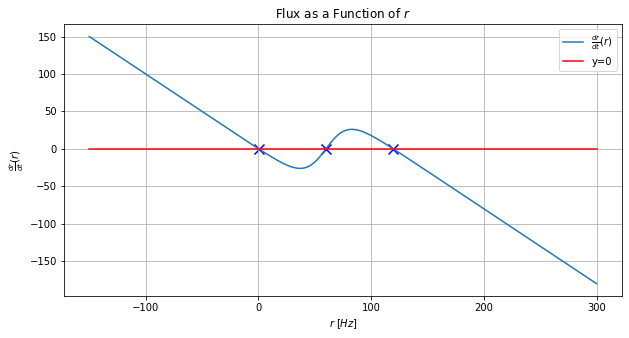

In [11]:
# 1.4 Plot derivative 

#get r and dr vals 
r_vals = np.linspace(-150,300,1000) 
dr_vals = np.array([dr(r) for r in r_vals]) 

#plot 
plt.figure(figsize=(10, 5))
plt.plot(r_vals,dr_vals,label="$\\frac{dr}{dt}(r)$");plt.grid() 
plt.plot(r_vals, np.zeros(1000),color='r',label="y=0")
plt.scatter([0.3,60,119], [0,0,0], color = 'blue', marker = 'x', s=100)
plt.xlabel("$r$ $[Hz]$");plt.ylabel("$\\frac{dr}{dt}(r)$")
plt.title("Flux as a Function of $r$")
plt.legend()
plt.savefig("figures/1-4.png",dpi=500)

In [25]:
#1.5 Plot the bifurcation diagram 

#resolution of bifurcation plot 
n = 200
m = 1000 #number of r_vals 

#set desired w and I vals 
w_vals = np.linspace(0,1,n)
I_vals = np.linspace(-5,0,n) 
r_vals = np.arange(-500,500,1)
crossings = np.zeros((len(w_vals),len(I_vals)))

#generate crossings array
for i, w in enumerate(w_vals): 
    for j, I in enumerate(I_vals): 
        
        #compute dr_vals
        dr_vals = np.array([dr(r,w,I) for r in r_vals])
        #find zero crossings 
        signs = np.sign(dr_vals[dr_vals!=0])#!=0 to avoid double counting 
        crossings[i][j] = np.count_nonzero(np.diff(signs))
        
        #plt.plot(r_vals,dr_vals);plt.grid()
        #plt.title("w="+str(w)+";I="+str(I))
        #plt.show()
        

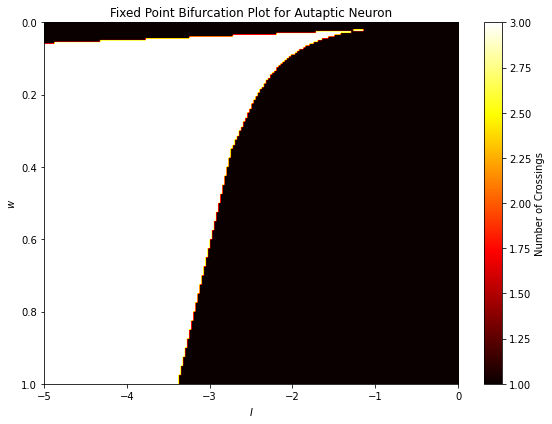

In [26]:
#plot: make a heat map 

#create heat map 
plt.figure(figsize=(8,6)) 
plt.imshow(crossings, cmap='hot', aspect = 'auto', extent=[I_vals[0], I_vals[-1], w_vals[-1], w_vals[0]])

#add colorbar 
plt.colorbar(label='Number of Crossings')

#set up axis right
plt.xlabel('$I$')
plt.ylabel('$w$')
plt.title('Fixed Point Bifurcation Plot for Autaptic Neuron')
plt.tight_layout()
plt.savefig("figures/1-52.png",dpi=500)


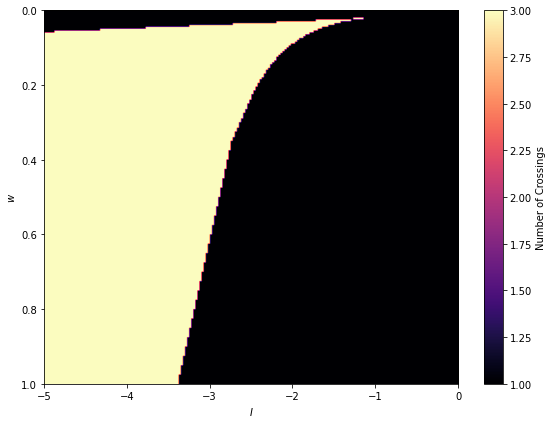

In [19]:
#plot : make a heat map 

#create heat map 
plt.figure(figsize=(8,6)) 
plt.imshow(crossings, cmap='magma', aspect = 'auto', extent=[I_vals[0], I_vals[-1], w_vals[-1], w_vals[0]])

#add colorbar 
plt.colorbar(label='Number of Crossings')

#set up axis right
plt.xlabel('$I$')
plt.ylabel('$w$')
plt.tight_layout()
plt.savefig("figures/1-5.png")